# Metodo de Euler para la solucion de EDOs o como metodo de integracion

Para comprender la solución de una EDO, iniciaremos con el análisis de un sistema conn oscilador armónico amortiguado.

![title](Sistema.bmp)

Para el sistema, partimos de que $F = ma$. Si hacemos la sumatoria de fuerzas, y teniendo en cuenta que $a=\frac{dR(t)^2}{dt}$, tendremos que:

$$m = \frac{dR(t)^2}{dt^2} = -\zeta \frac{dR(t)^2}{dt} - kR(t)$$

1. Constante del resorte $k$
2. Constante de friccion $\zeta$
3. Masa de la partícula $m$
4. Posición de la partícula $R(t)$
5. Velocidad de la partícula $V(t)$
6. Fuerza del resorte $-kR(t)$
7. Fuerza de fricción $-\zeta V(t) = -\zeta \frac{dR(t)}{dt}$

Debido a que tenemos una ecuación de segundo order,  vamos a utilizar una sustitucion que nos baje un grado a la EDO. Vamos a sustituir $\frac{dR(t)}{dt} = V(t)$.

$$f(t,R,V) = \frac{dR(t)}{dt} = V(t) \quad (1)$$
$$F(t,R,V) = \frac{dV(t)}{dt} = \frac{1}{m}(-\zeta V(t)-kR(t)) \quad (2)$$

In [28]:
%matplotlib nbagg
#línea mágica para la construcción de gráficos
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation # librería para animaciones
# cambiamos el estilo de graficación
plt.style.use('ggplot')

Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 389, in process
    proxy(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 227, in __call__
    return mtd(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1560, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [29]:
# inicializamos las variables necesarias
dim = 2 # trabajamos en dos dimensiones
conteo_t = 100000 # número de iteraciones
R = np.zeros(dim) # posición de la partícula
V = np.zeros(dim) # velocidad de la partícula
Rs = np.zeros([dim, conteo_t]) # todas las posiciones de la particula
Vs = np.zeros([dim, conteo_t]) # todas las velocidades de la particula
tiempo = np.zeros(conteo_t) # vector de los tiempos t_i

In [30]:
# definimos las funciones para la animación
def iniciar(): # función para inicializar la animacion
    particula.set_data([], []) # particula de masa m
    linea.set_data([], []) # la trayectoria
    titulo.set_text(r'') # el titulo cambia con el tiempo
    return particula, linea, titulo

Para el método de Euler, $R(t+1) = R(t)+k_1$, con $k_1=h*f(t,R,V)$  y  $f(t,R,V) = V(t)$

In [31]:
def animar(i): # funcion para la animacion
    global R, V, Rs, Vs, tiempo, h
    k1r = h*V
    R = R + k1r
    k1v = h*(-zeta*V/m-k*R/m)
    V = V + k1v
    Rs[0:dim, i] = R # guardamos la posición actual
    Vs[0:dim, i] = V # guardamos la velocidad actual
    tiempo[i] = i*h # el tiempo aumenta con el paso h
    particula.set_data(R[0], R[1]) # fijamos la posicion de la particula
    linea.set_data(Rs[0,0:i], Rs[1,0:i]) #fijamos la trayectoria
    titulo.set_text(r"$t = {0: .2f}$".format(i*h)) # fijamos el formato del titulo
    return particula, linea, titulo

<IPython.core.display.Javascript object>


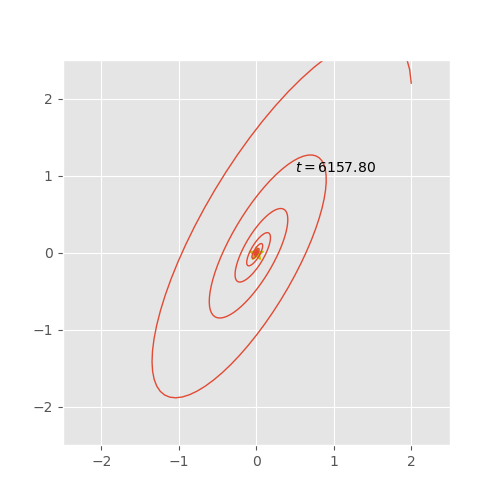

In [35]:
# corremos la animacion
m, k, zeta =  1.0, 1.0, 0.25 # definimos las constantes del sistema
h = 0.1 # fijamos el paso
# establecemos las condiciones iniciales
R[0], R[1] = 2., 2. # Rx(0) Ry(0)
V[0], V[1] = 0., 2. # Vx(0) Vy(0)

# area del dibujo
area = 5 # tamaño para el área del dibujo
# instancias la figura
fig, ax = plt.subplots(figsize=(5, 5))
# dibujamos los ejes
ax = plt.axes(xlim=(-area/2, area/2), ylim=(-area/2, area/2))
particula, = ax.plot([], [], 'y*', ms = 10) # definimos la partícula
linea, = ax.plot([], [], lw=1) # definimos la línea de la trayectoria
titulo = ax.text(0.5, 1.05, r'') # definimos el título

# definimos la animacion
anim = animation.FuncAnimation(fig, animar, init_func=iniciar, frames=conteo_t, interval=5, blit=True, repeat=False)